In [34]:
import cv2 as cv
import numpy
import matplotlib.pyplot as plt

from contextlib import contextmanager
import subprocess
import os
import shutil

In [35]:
# Load the image
img = cv.imread("photos\\old_w_scratch\\d.png", cv.IMREAD_COLOR)
# Convert the image to RGB
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Check if the image was loaded successfully
if img is None:
    raise FileNotFoundError("The image file could not be found or loaded.")


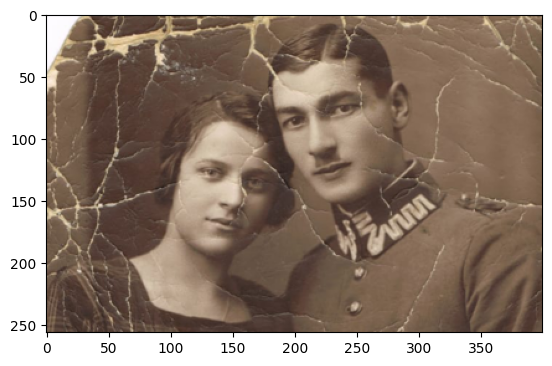

In [36]:
# display the image with matplotlib
plt.imshow(img)
plt.show()

In [37]:
@contextmanager
def temporary_directory_change(directory):
    """Context manager for temporary change of working directory."""
    original_directory = os.getcwd()
    print(original_directory)
    try:
        os.chdir(directory)
        yield
    finally:
        os.chdir(original_directory)


# now we need to create a mask for the scratch
# we will create it with using a trained model

def generate_mask(image):
    """
    Automates the mask generation process using the Bringing-Old-Photos-Back-to-Life repository.

    Parameters:
        test_path (str): Path to the input images.
        output_dir (str): Path where output masks will be saved.
        input_size (str): Size of the input image, default is 'full_size'.
        gpu (str): GPU setting, default is '-1' (use CPU).
    """

    # get the full path of the directories in the 'mask_generation' folder
    # get the full path of the directory 'input' in the 'mask_generation'
    input_dir = os.path.abspath("mask_generation\\input")
    # get the full path of the directory 'output' in the 'mask_generation'
    output_dir = os.path.abspath("mask_generation\\output")


    # remove the content inside these directories
    for directory in [input_dir, output_dir]:
        try:
            shutil.rmtree(directory)
            os.makedirs(directory)
        except PermissionError:
            print(f"Permission denied: {directory}")

    # write the image to the path: "mask_generation/input"
    cv.imwrite(os.path.join(input_dir, "image.png"), image)


    # Command to execute
    command = [
        "python",
        "detection.py",
        "--test_path", input_dir,
        "--output_dir", output_dir,
        "--input_size", "full_size",
        "--GPU", "-1"
    ]
    
    # Change directory to the script's location
    script_dir = r"C:\\Users\\yasir\\Desktop\\image_project\\Bringing-Old-Photos-Back-to-Life\\Global"
    
    # Run the command
    with temporary_directory_change(script_dir):
        try:
            result = subprocess.run(command, check=True, capture_output=True, text=True)
            print("Mask generation completed successfully.")
            print(result.stdout)
        except subprocess.CalledProcessError as e:
            print("Error occurred while generating masks:")
            print(e.stderr)
            
    mask = cv.imread("mask_generation\\output\\mask\\image.png", cv.IMREAD_GRAYSCALE)
    return mask
    

In [ ]:
mask = generate_mask(img)

c:\Users\yasir\Desktop\image_project\old_photo_restoration
Mask generation completed successfully.
initializing the dataloader
model weights loaded
directory of testing image: c:\Users\yasir\Desktop\image_project\old_photo_restoration\mask_generation\input
processing image.png



In [48]:
# print the mask which is a binary mask
# print the type of the mask
print(mask)


[[  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
